In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.txt to diabetes.txt


Импортируем библиотеки и загружаем датасет

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./diabetes.txt', sep='\t')

In [6]:
#просмотр первых пяти строк
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [7]:
#размер датасета - количетсво строк и столбцов
df.shape

(442, 11)

In [8]:
#информация о столбцах датасета
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [9]:
#типы данных столбцов
df.dtypes


AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

Проверим датасет на наличие пропусков

In [10]:
for col in df.columns:
    is_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(is_missing*100)))

AGE - 0%
SEX - 0%
BMI - 0%
BP - 0%
S1 - 0%
S2 - 0%
S3 - 0%
S4 - 0%
S5 - 0%
S6 - 0%
Y - 0%


Пропусков нет


In [11]:
#описательная статистика
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


**Визуальное исследование датасета**

Построим диаграмму рассеивания для колонок S1 (общий холестерин) и S2 (липопротеины низкой плотности)

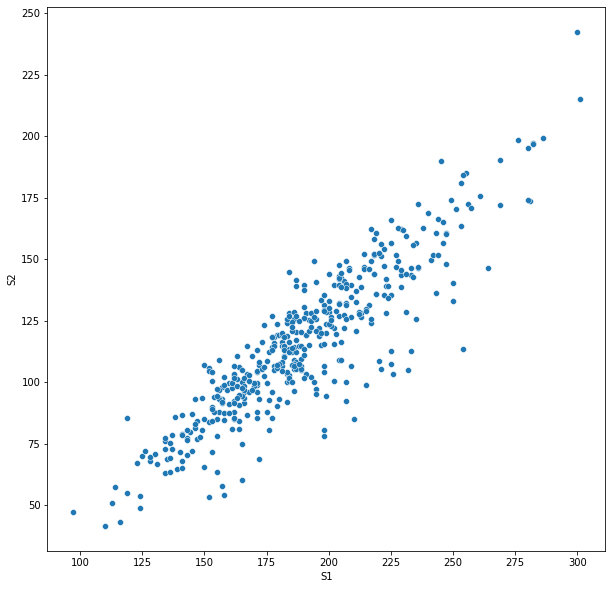

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='S1', y='S2', data=df)

Получили практически линейную зависимость двух показателей

Построим гистограмму, чтобы оценить плотность вероятности распределения данных (для столбца S1 - общий холестерин)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


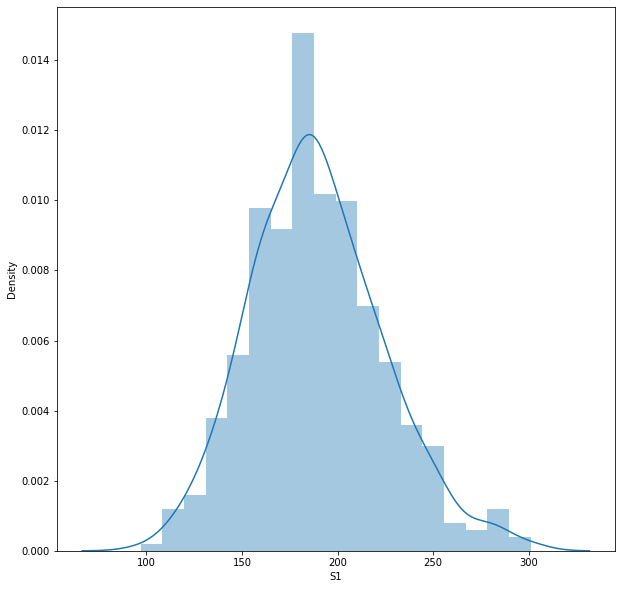

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['S1'])

Построим комбинацию гистрограмм и диграммы рассеивания

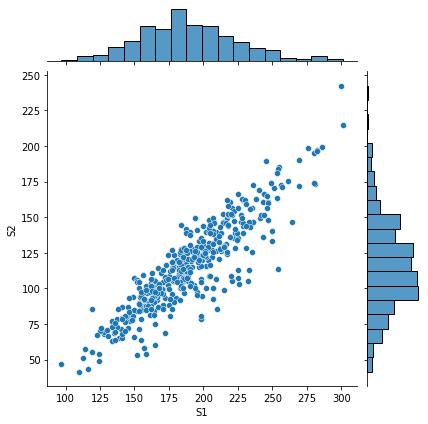

In [47]:
sns.jointplot(x='S1', y='S2', data=df)

Посмотроим комбинацию гистограмм и диаграмм рассеивания для всего набора данных


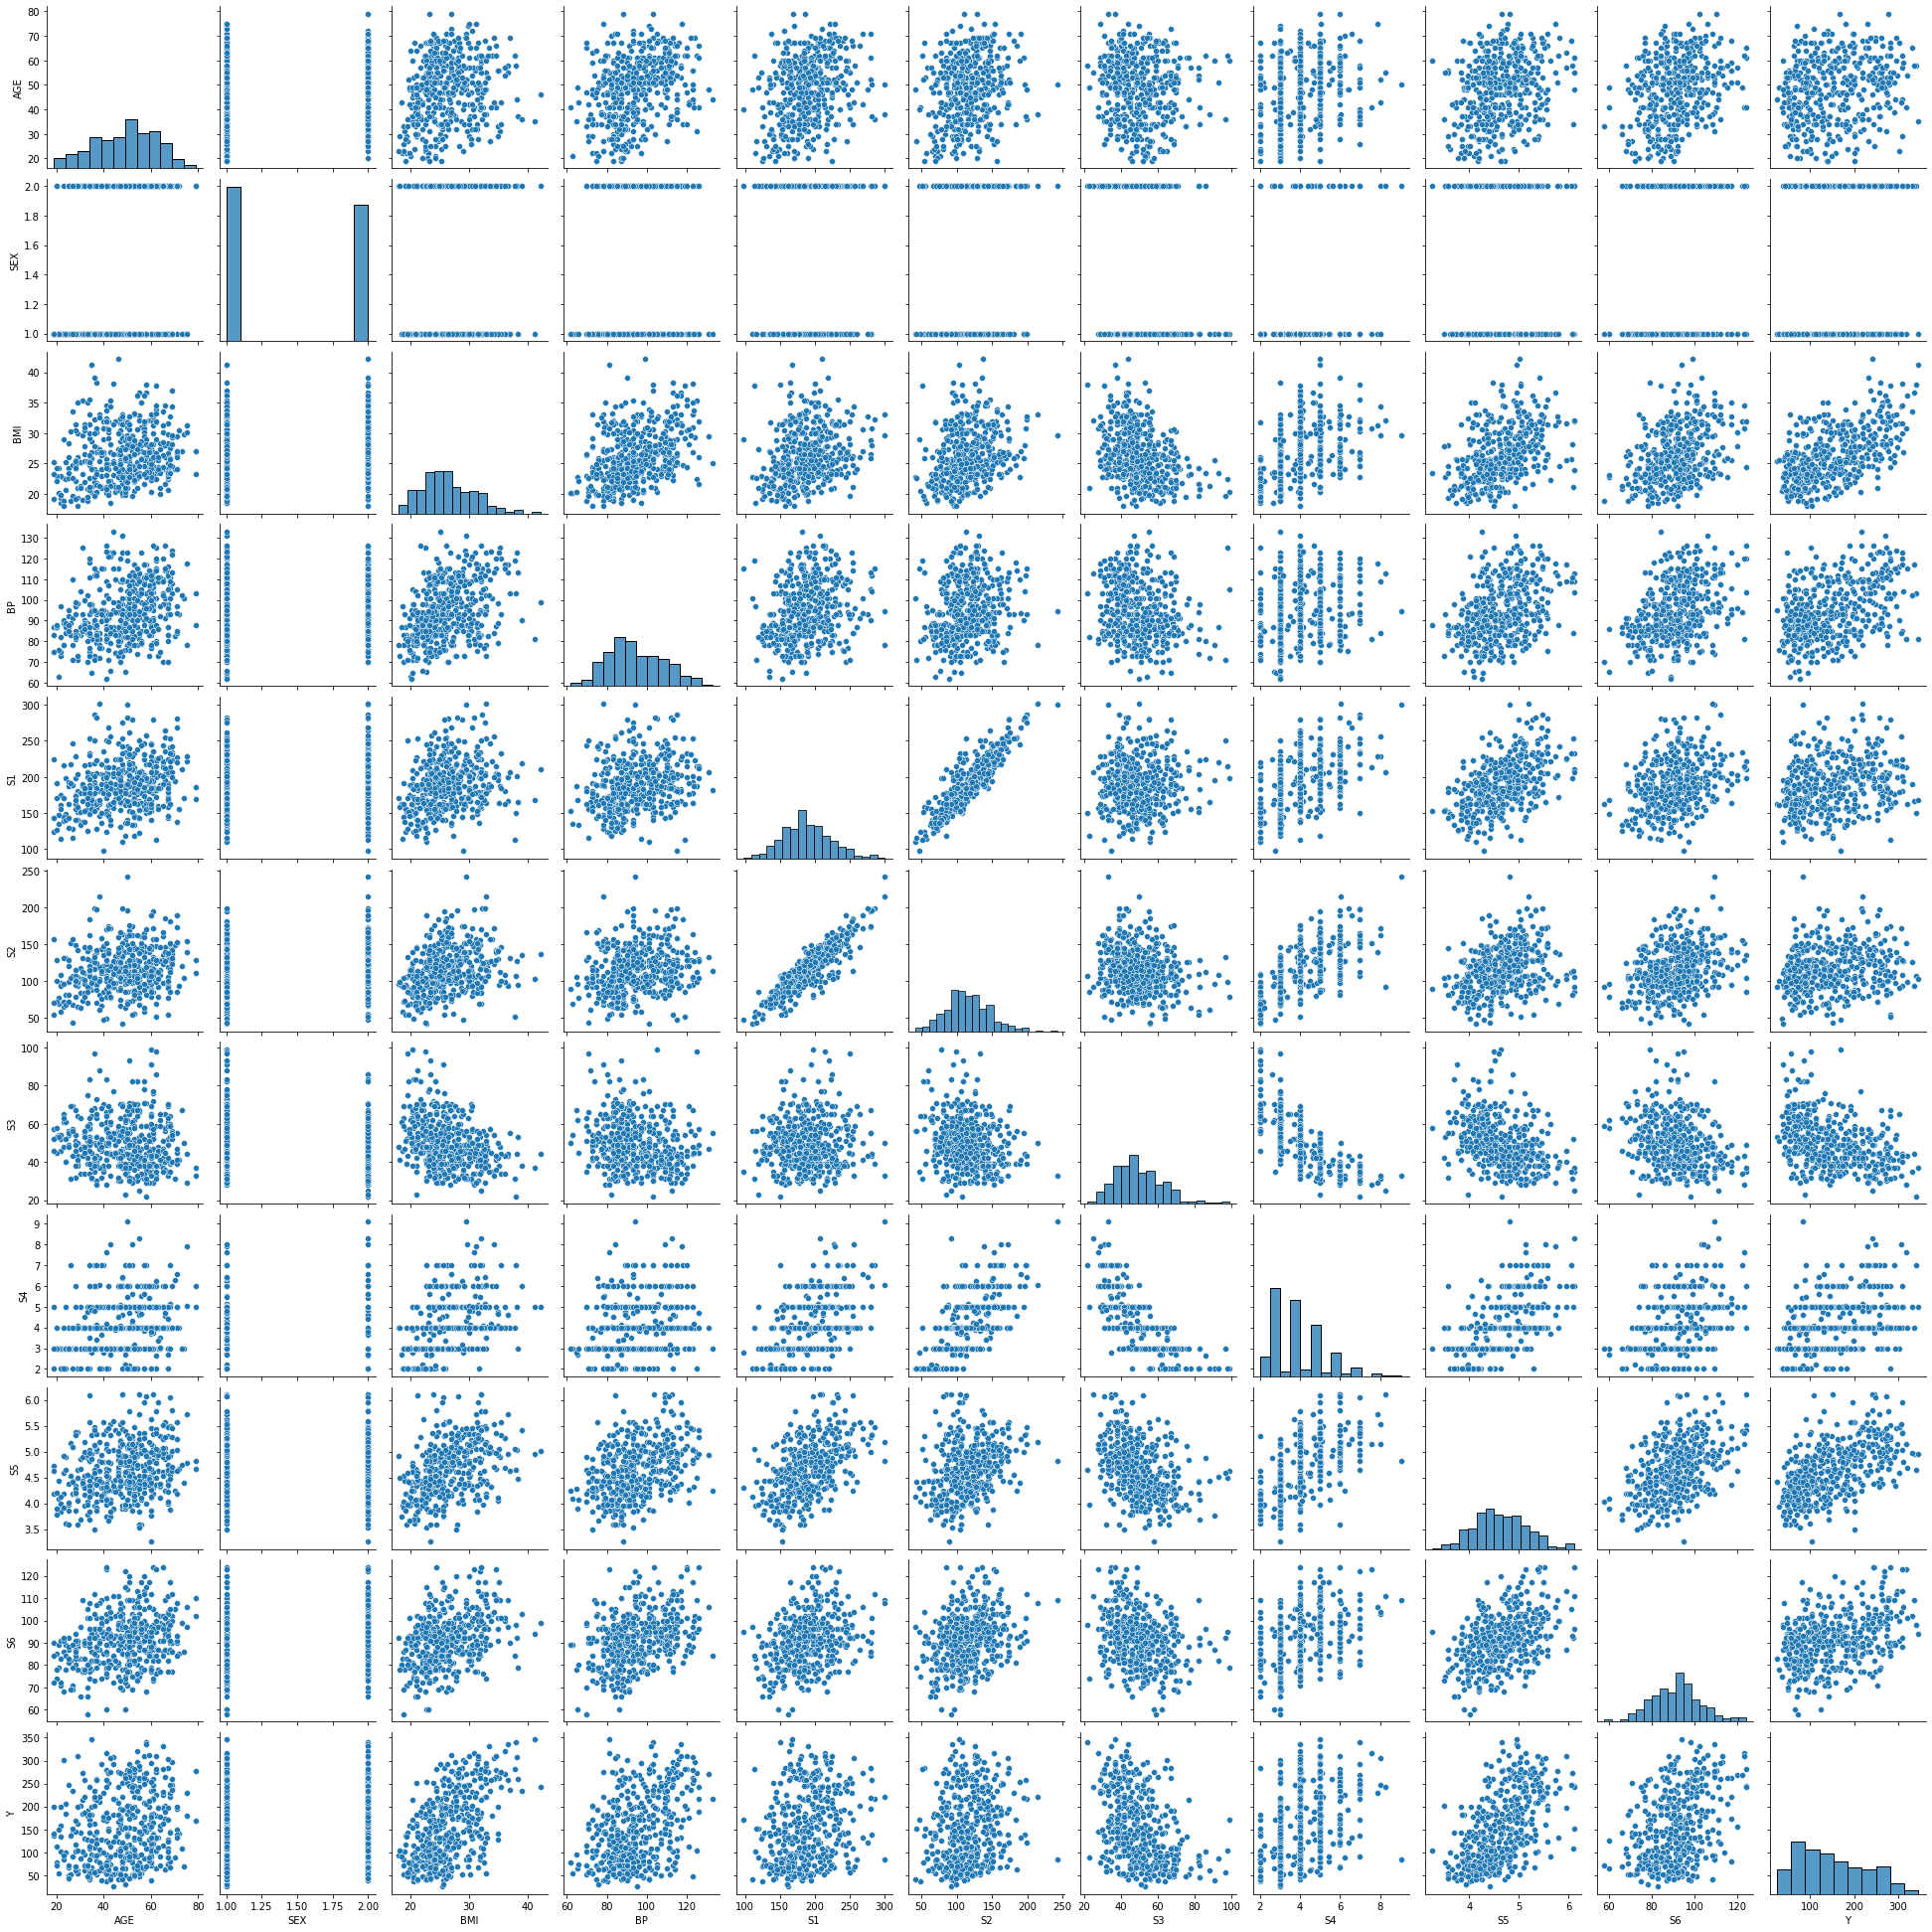

In [50]:
sns.pairplot(df)

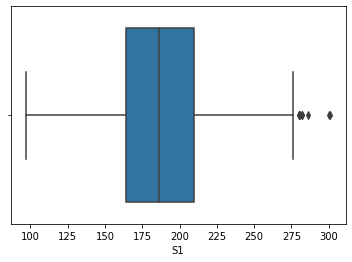

In [53]:
#одномерное распределение вероятности
sns.boxplot(x=df['S1'])

Построим распределение параметра Sex, сгруппированного по признаку Y (количественная мера прогрессирования заболевания через год)

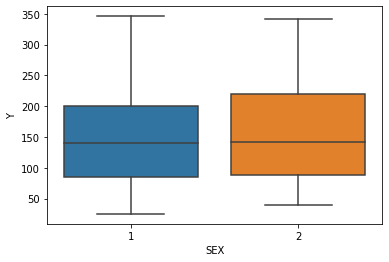

In [60]:
sns.boxplot(x='SEX', y='Y', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


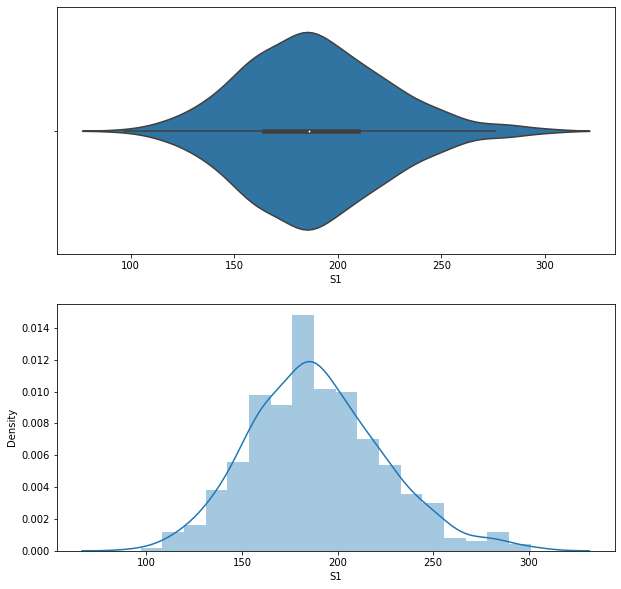

In [61]:
#распределение параметра S1 с отображением плотности по краям
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['S1'])
sns.distplot(df['S1'], ax=ax[1])

**Корреляция признаков**

In [62]:
#корреляционная матрица
df.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Видно, что нет сильной корреляции целевого признака Y с каким-либо параметром модели. Присутсвует достаточная корреляция с параметрами BMI и S5 (уровень липидов). Отрицательня корреляция с признаком S3, то есть между парамтрами обратная зависимость. Слабая корреляция с параметрами SEX и S2, так что они могут быть исключены из модели.

Посмотроим тепловую карту для визуализации корреляционной матрицы

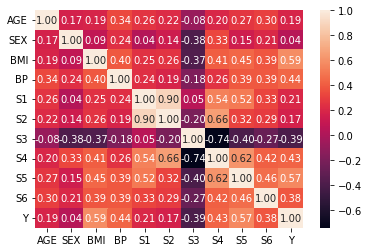

In [64]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

На карте хорошо видна корреляция между нецелевыми признаками S1 и S2.

Построим корреляционные матрицы другими методами

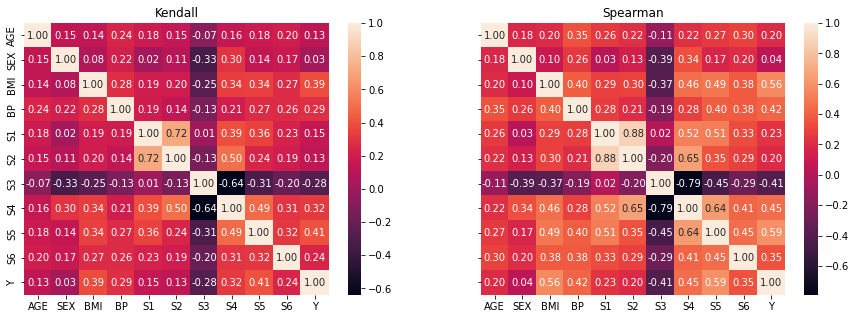

In [68]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(method='kendall'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='spearman'), ax=ax[1], annot=True, fmt='.2f')
ax[0].title.set_text('Kendall')
ax[1].title.set_text('Spearman')